## Introduction

One of the most popular social media platforms these days is Instagram. People who are professional in using Instagram, they use it for making content, blogging, developing portfolio and business. Since Instagram is being used by millions of people belonging to different kinds of genre so Instagram keeps updating itself for consumers and content creators but it will effect on our posts reach as long as this will be happening. So, in order to get success in the platform content creators have to look into their Instagram reach data.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

## Read Data

In [2]:
data = pd.read_csv('/content/Instagram data.csv',encoding='latin1')

In [3]:
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

## Check whether a dataset contain null value or not

In [4]:
data.isnull().sum()

,0
Impressions,0
From Home,0
From Hashtags,0
From Explore,0
From Other,0
Saves,0
Comments,0
Shares,0
Likes,0
Profile Visits,0


## Remove the rows which contain null values

In [5]:
data = data.dropna()

## Examine the column insights to determine the type of data in each column.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


## Examining Instagram Reach
First, let's examine how many people have seen my Instagram postings.

I'll start by examining the dispersion of the impressions I've gotten from home.

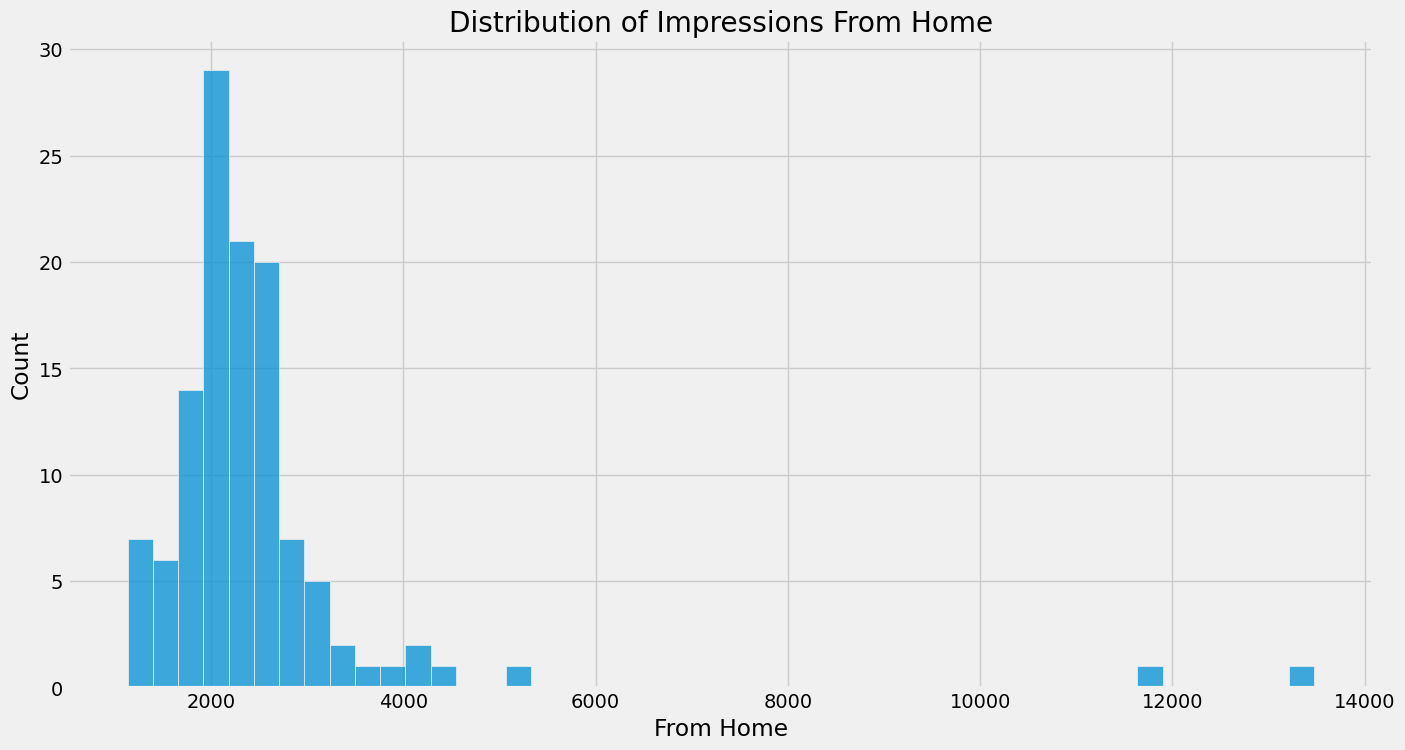

In [8]:
plt.figure(figsize=(15, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
#sns.distplot(data['From Home'])
sns.histplot(data['From Home'])
plt.show()

## Observation
The number of impressions my posts get from the home section of Instagram tells me how many of my followers see them.

From home I can tell you its difficult to talk to all of my fans everyday.

Now let's see in which impressions i got using hashtags were distributed:

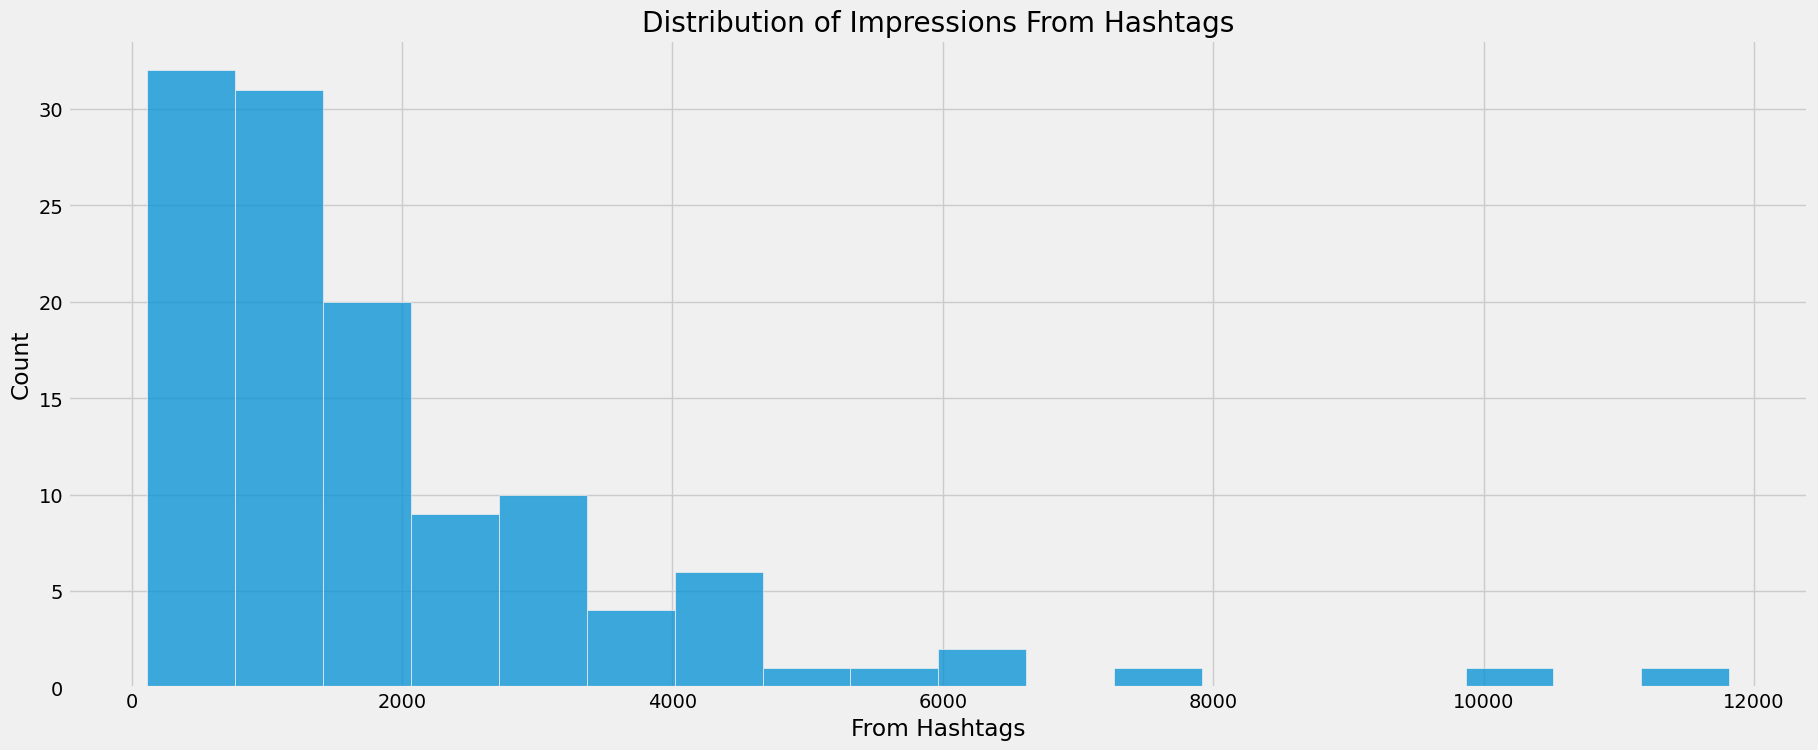

In [9]:
plt.figure(figsize=(20, 8))
plt.title("Distribution of Impressions From Hashtags")
#sns.distplot(data['From Hashtags'])
sns.histplot(data['From Hashtags'])
plt.show()

##Hashtag
We use hashtag to categorized our Instagram photos so we can expose our content to wider audience.

Even though hashtags can’t get to every single post, they can get to a lot of new eyes, and we can see that through hashtag impression data.

Now, let's analyze impression distribution I got from explore of Instagram:

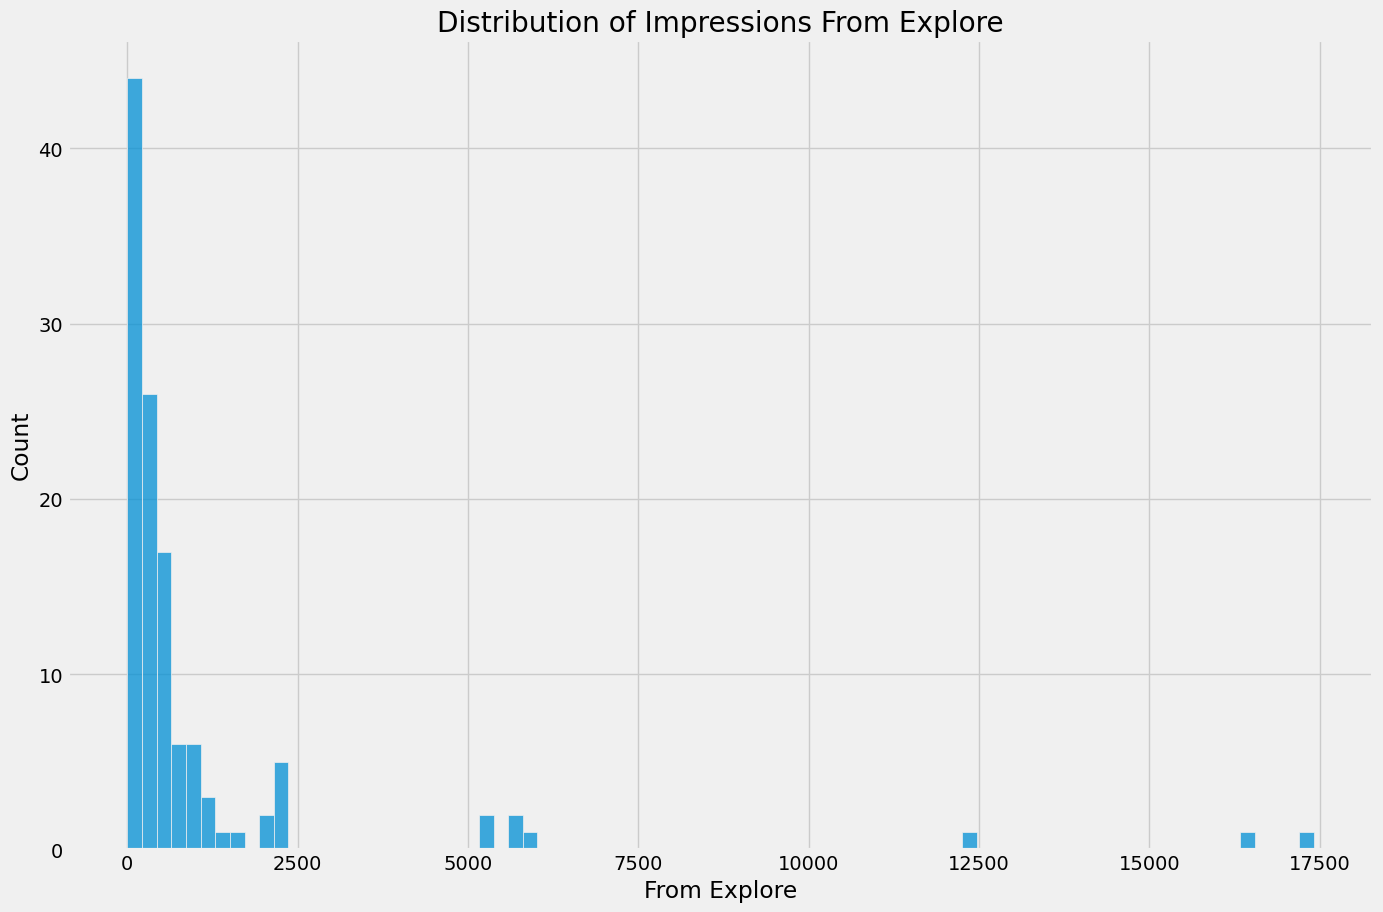

In [10]:
plt.figure(figsize=(15, 10))
plt.title("Distribution of Impressions From Explore")
#sns.distplot(data['From Explore'])
sns.histplot(data['From Explore'])
plt.show()

Instagram's suggestion algorithm is placed in the explore section, this gives users post suggestions of things they'll like and might be interested in.

Based on the impressions I've gotten from the explore section, Instagram doesn't really recommend our content to people. While the reach from the explore section has helped a few times on my posts, it's still very little compared to the reach I get through hashtags.

Instagram Impressions sources percentage break down:

In [11]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels,
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

According to the donut figure above, my followers account for about 45% of the reach, followed by hashtags (33.6%), the explore section (19.2%), and other sources (3.15%).

##Examining Information
Let’s look at the data that I share on Instagram. 2 variables in the dataset – caption and hashtags– will help us understand what kind of stuff I share on Instagram.

To make a wordcloud of the caption column and see which words are the most used in the captions of my instagram pictures:

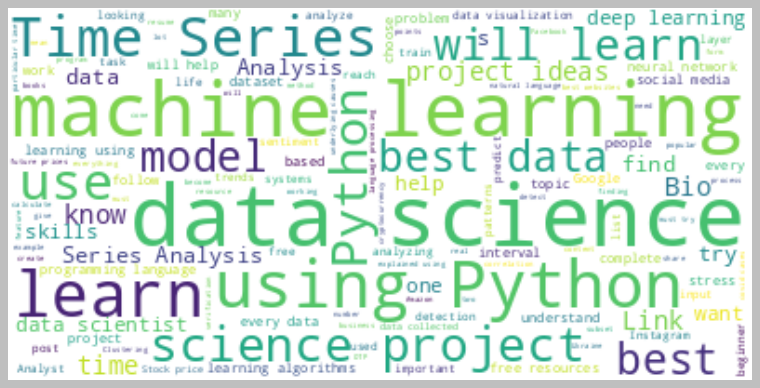

In [12]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Let’s create a wordcloud of the hashtags column to look at the most used hashtags in my Instagram posts:

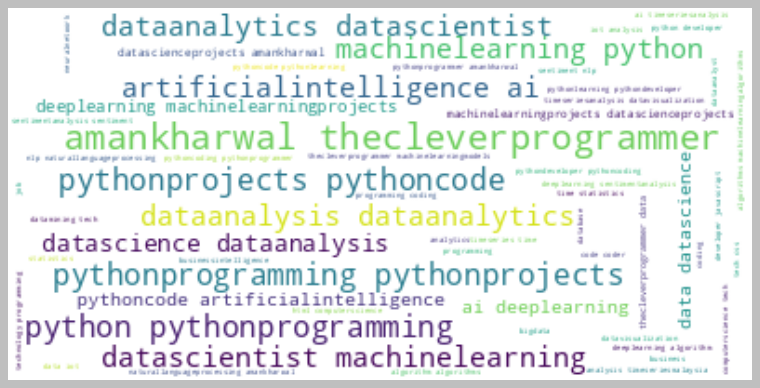

In [13]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Analyzing Relationships
Let’s analyze relationships to find the most important factors of our Instagram reach. It will also help us in understanding how the Instagram algorithm works.

Let’s have a look at the relationship between the number of likes and the number of impressions on my Instagram posts:

In [14]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols",
                    title = "Relationship Between Likes and Impressions")
figure.show()

There is a linear relationship between the number of likes and the reach I got on Instagram.

Let’s see the relationship between the number of comments and the number of impressions on my Instagram posts:

In [15]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols",
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

It looks like the number of comments we get on a post doesn’t affect its reach.

Let’s have a look at the relationship between the number of shares and the number of impressions:

In [16]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols",
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

There is a linear relationship between the number of times my post is saved and the reach of my Instagram post.

Let’s have a look at the correlation of all the columns with the Impressions column:

In [32]:
data['Impressions'] = pd.to_numeric(data['Impressions'], errors='coerce')


In [33]:
data_numeric = data.select_dtypes(include=[float, int])


In [34]:
data_numeric = data_numeric.dropna()


In [35]:
correlation_matrix = data_numeric.corr()


In [36]:
print(correlation_matrix)


                Impressions  From Home  From Hashtags  From Explore  \
Impressions        1.000000   0.844698       0.560760      0.893607   
From Home          0.844698   1.000000       0.177516      0.800573   
From Hashtags      0.560760   0.177516       1.000000      0.190453   
From Explore       0.893607   0.800573       0.190453      1.000000   
From Other         0.592960   0.555666       0.229623      0.495685   
Saves              0.779231   0.768817       0.305929      0.747803   
Comments          -0.028524   0.012716       0.161439     -0.158565   
Shares             0.634675   0.674985       0.219511      0.615731   
Likes              0.849835   0.698330       0.662124      0.653699   
Profile Visits     0.760981   0.531076       0.691345      0.531850   
Follows            0.889363   0.672675       0.555485      0.796019   

                From Other     Saves  Comments    Shares     Likes  \
Impressions       0.592960  0.779231 -0.028524  0.634675  0.849835   
From Ho

In [37]:
print(correlation_matrix['Impressions'].sort_values(ascending=False))


Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


Therefore, we may conclude that obtaining more likes and saves on Instagram will increase your reach.

While having more shares can help you reach a wider audience, having fewer shares won't have any impact on your reach.


##Analyzing Conversion Rate
In Instagram, conversation rate means how many followers you are getting from the number of profile visits from a post.

The formula that you can use to calculate conversion rate is (Follows/Profile Visits) * 100. Now let’s have a look at the conversation rate of my Instagram account:

In [38]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


So the conversation rate of my Instagram account is 31% which sounds like a very good conversation rate.

Let’s have a look at the relationship between the total profile visits and the number of followers gained from all profile visits:

In [39]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols",
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

The relationship between profile visits and followers gained is also linear.

## Conclusion

The analysis of Instagram post reach reveals several key insights:
Linear Relationship with Saves:
The number of times a post is saved is linearly associated with its reach; this means that posts with more saves are associated with reaching more people.

Correlation Analysis:
The correlation matrix would demonstrate the significant relationships of all kinds of elements with impressions. Specifically speaking:
Impressions actually have a really strong positive correlation with likes, profile visits and how many times a post is shared.
The reach from 'explore' section has one of the highest correlationship with the total impressions so it seems like if you get into the 'explore' section your post will be shown to a lot more people.

Profile Visits and Followers:
The relationship is same as the above mention point, linear. It means that if you can increase profile visits in any way then you will eventually gain more followers.

Overall, the findings emphasize the importance of engagement metrics such as saves, likes, and shares in enhancing the reach of Instagram posts. Furthermore, strategies that drive profile visits can effectively lead to an increase in followers. By focusing on these key areas, one can optimize their Instagram presence and achieve greater reach and engagement.